# Milestone 3



# Model Building

## Spliting Dataset

In [16]:
# import function of train_test_splite to splite dataset
from sklearn.model_selection import train_test_split

# Features of data
X = df[["creditscore","numofproducts","balance","genderlabel","ageskewed","isactivemember","geographyfrance","geographygermany","geographyspain"]]

#X = df.drop(columns=["creditscore","geography", "gender", "age","tenure","hascrcard","estimatedsalary","exited","creditscorerange","balancerange","estimatedsalaryrange","tenurerange"])

y = df["exited"]

# Splite dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, stratify=y, random_state=60)

# Display dataset after spliting
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7996, 9)

(7996,)

(2000, 9)

(2000,)

## Smote Over Sample in dataset

(12734, 9)

(12734,)

(2000, 9)

(2000,)

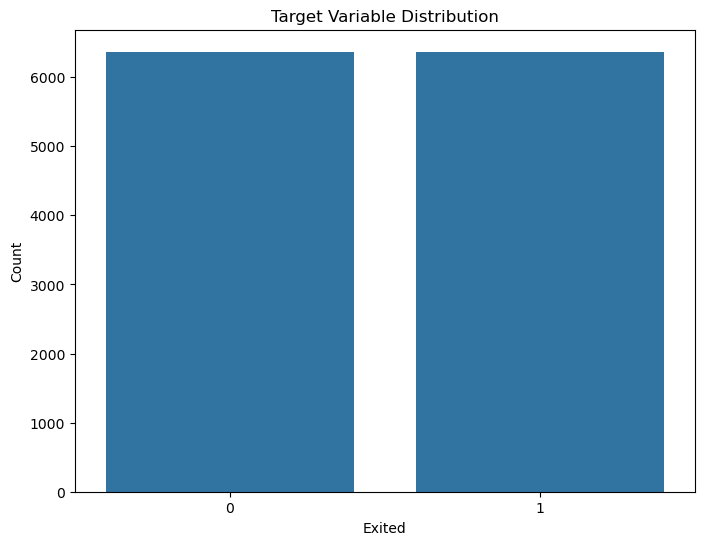

In [18]:
from imblearn.over_sampling import SMOTE

# Over-sampling Technique
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Shaping data after smote it
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# visualize target using bar
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Target Variable Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

## Scaling Data

In [20]:
from sklearn.preprocessing import StandardScaler

#  Create Scaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 1- Models Training and Evalaute With Defaulte Setting

## 1- Logistic Regression	

### Training Model 1 
#### Logistic Regression

In [22]:
# Training Model 1 Logistic Regression
# Importing Model
from sklearn.linear_model import LogisticRegression

# Create Model
Model1 = LogisticRegression(max_iter=1000)
Model1.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

### Evaluate Model 1
#### Logistic Regression

In [50]:
# Evaluate Model1 Logistic Regression
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred1 = Model1.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred1))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred1))

# Predict Model Test
y_test_pred1 = Model1.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred1))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred1))


 Confusion_matrix training 

 [[5440  927]
 [1317 5050]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.81      0.85      0.83      6367
           1       0.84      0.79      0.82      6367

    accuracy                           0.82     12734
   macro avg       0.82      0.82      0.82     12734
weighted avg       0.82      0.82      0.82     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1364  228]
 [ 206  202]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1592
           1       0.47      0.50      0.48       408

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000



## 2- Decision Tree

### Training Model 2
#### Decision Tree

In [54]:
# Training Model2 Decision Tree
# Importing Model
from sklearn.tree import DecisionTreeClassifier

# Create Model
Model2 = DecisionTreeClassifier(random_state= 60)

# Train Model
Model2.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=60)

### Evaluate Model 2
#### Decision Tree

In [56]:
# Evaluate Model2 Decision Tree
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred2 = Model2.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred2))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred2))

# Predict Model Test
y_test_pred2 = Model2.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred2))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred2))


 Confusion_matrix training 

 [[6367    0]
 [   2 6365]]

 Classification_report training 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6367
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1314  278]
 [ 165  243]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1592
           1       0.47      0.60      0.52       408

    accuracy                           0.78      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.80      0.78      0.79      2000



## 3- Random Forest

### Training Model 3
#### Random Forest

In [53]:
## Training Model

# Training Model3 Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create Model
Model3 = RandomForestClassifier(random_state=60)

# Train Model
Model3.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=60)

### Evaluate Model 3
#### Random Forest

In [57]:
## Evaluate Model

# Evaluate Model3 Random Forest
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred3 = Model3.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred3))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred3))

# Predict Model Test
y_test_pred3 = Model3.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred3))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred3))


 Confusion_matrix training 

 [[6366    1]
 [   2 6365]]

 Classification_report training 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6367
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1422  170]
 [ 165  243]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1592
           1       0.59      0.60      0.59       408

    accuracy                           0.83      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000



## 4- K-Nearest Neighbors (KNN)

### Training Model 4
#### KNN

In [66]:
# Training Model4 KNN
from sklearn.neighbors import KNeighborsClassifier

# Create the model
Model4 = KNeighborsClassifier()  # Default: n_neighbors=5

# Train Model
Model4.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Evaluate Model 4
#### KNN

In [68]:
# Evaluate Model4 KNN
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred4 = Model4.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred4))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred4))

# Predict Model Test
y_test_pred4 = Model4.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred4))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred4))


 Confusion_matrix training 

 [[5768  599]
 [ 680 5687]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.89      0.91      0.90      6367
           1       0.90      0.89      0.90      6367

    accuracy                           0.90     12734
   macro avg       0.90      0.90      0.90     12734
weighted avg       0.90      0.90      0.90     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1394  198]
 [ 154  254]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1592
           1       0.56      0.62      0.59       408

    accuracy                           0.82      2000
   macro avg       0.73      0.75      0.74      2000
weighted avg       0.83      0.82      0.83      2000



## 5- Support Vector Machine (SVC)

## Training Model 5
#### SVC

In [67]:
## Training Model5 SVC
from sklearn.svm import SVC
# Create Model
Model5 = SVC(random_state=60)

# Train Model
Model5.fit(X_train_scaled, y_train)

SVC(random_state=60)

## Evaluate Model 5
#### SVC

In [69]:
# Evaluate Model5 SVC
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred5 = Model5.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred5))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred5))

# Predict Model Test
y_test_pred5 = Model5.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred5))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred5))


 Confusion_matrix training 

 [[5725  642]
 [1043 5324]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      6367
           1       0.89      0.84      0.86      6367

    accuracy                           0.87     12734
   macro avg       0.87      0.87      0.87     12734
weighted avg       0.87      0.87      0.87     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1429  163]
 [ 165  243]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1592
           1       0.60      0.60      0.60       408

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



## 6- XGBoost

In [74]:
# Installing XGBoost
!pip install xgboost

## Training Model 6
#### XGBoost

In [30]:
# Installing XGBoost
!pip install xgboost

In [32]:
# Training Model6 XGBoost
from xgboost import XGBClassifier
# Create and train the model
Model6 = XGBClassifier(random_state=60)

# Train Model
Model6.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Evaluate Model 6
#### XGBoost

In [34]:
# Evaluate Model6 xgboost
# Importing metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict Model Train
y_train_pred6 = Model6.predict(X_train_scaled)

# Evaluate Model Train
print("\n Confusion_matrix training \n\n",confusion_matrix(y_train, y_train_pred6))
print("\n Classification_report training \n\n",classification_report(y_train, y_train_pred6))

# Predict Model Test
y_test_pred6 = Model6.predict(X_test_scaled)

# Evaluate Model Test
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing \n\n",confusion_matrix(y_test, y_test_pred6))
print("\n Classification_report testing \n\n",classification_report(y_test, y_test_pred6))


 Confusion_matrix training 

 [[6165  202]
 [ 469 5898]]

 Classification_report training 

               precision    recall  f1-score   support

           0       0.93      0.97      0.95      6367
           1       0.97      0.93      0.95      6367

    accuracy                           0.95     12734
   macro avg       0.95      0.95      0.95     12734
weighted avg       0.95      0.95      0.95     12734



 -----------------------------------------------------------------

 Confusion_matrix testing 

 [[1468  124]
 [ 169  239]]

 Classification_report testing 

               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1592
           1       0.66      0.59      0.62       408

    accuracy                           0.85      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [36]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    make_scorer, recall_score, accuracy_score,
    precision_score
)

import numpy as np
import matplotlib.pyplot as plt

def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return recall * 0.6 + accuracy * 0.4

# Create XGBoost
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=60
)

# Transaction Network
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'scale_pos_weight': [3, 4, 5]
}

# Network search
grid_search6 = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(custom_score),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Training
grid_search6.fit(X_train_scaled, y_train)


print("Best parameters:", grid_search6.best_params_)


y_train_pred6 = grid_search6.predict(X_train_scaled)
print("\nConfusion Matrix - Training:\n", confusion_matrix(y_train, y_train_pred6))
print("\nClassification Report - Training:\n", classification_report(y_train, y_train_pred6))

y_probs = grid_search6.predict_proba(X_test_scaled)[:, 1]


thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

optimal_threshold = 0.4
y_test_pred = (y_probs >= optimal_threshold).astype(int)

print("\nConfusion Matrix - Testing:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report - Testing:\n", classification_report(y_test, y_test_pred))
print("\nROC AUC Score - Testing:", roc_auc_score(y_test, y_probs))


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_probs = grid_search6.predict_proba(X_test_scaled)[:, 1]



Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 5, 'subsample': 0.8}

Confusion Matrix - Training:
 [[5019 1348]
 [ 110 6257]]

Classification Report - Training:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      6367
           1       0.82      0.98      0.90      6367

    accuracy                           0.89     12734
   macro avg       0.90      0.89      0.88     12734
weighted avg       0.90      0.89      0.88     12734


Confusion Matrix - Testing:
 [[1071  521]
 [  63  345]]

Classification Report - Testing:
               precision    recall  f1-score   support

           0       0.94      0.67      0.79      1592
           1       0.40      0.85      0.54       408

    accuracy                           0.71      2000
   macro avg       0.67      0.76      0.66    

# 2-  AUC And ROC Training and Evalaute With Defaulte Setting

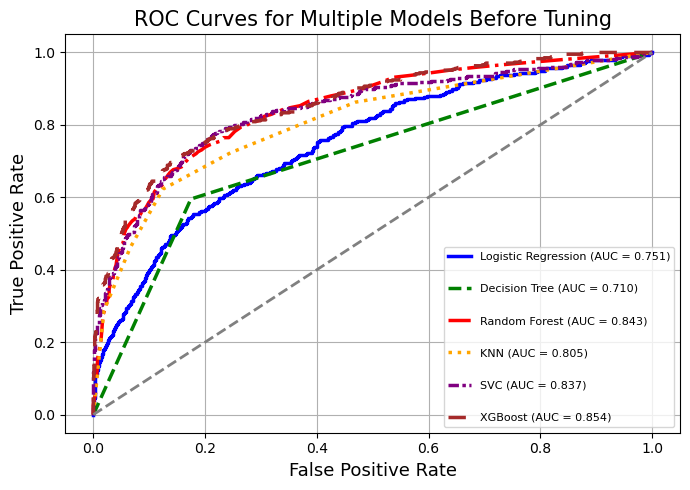

In [114]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import itertools

# Define the models
models = {
    'Logistic Regression': Model1,
    'Decision Tree': Model2,
    'Random Forest': Model3,
    'KNN': Model4,
    'SVC': Model5,
    'XGBoost': Model6
}

# Define custom line styles and colors for each model
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Use subplots to manage the figure and axis easily
fig, ax = plt.subplots(figsize=(7, 5))

for (name, model), style, color in zip(models.items(), line_styles, colors):
    
    # ==== ROC Curve ====
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)

    ax.plot(fpr, tpr, linestyle=style, color=color, linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')

    # ==== Classification Reports ====
    print(f'\n{name} - Classification Report (Train):')
    y_train_pred = model.predict(X_train_scaled)
    print(classification_report(y_train, y_train_pred, digits=4))
    
    print(f'\n{name} - Classification Report (Test):')
    y_test_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_test_pred, digits=4))

# Diagonal line for random model
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

ax.set_title('ROC Curves for Multiple Models Before Tuning', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)
ax.legend(loc='lower right', fontsize=8, labelspacing=2)
ax.grid(True)
plt.tight_layout()
plt.show()


#  3- Tuning Best 3 Models according to AUC and ROC Graph

## 1- Random Forest Tuning

In [88]:
# Tuning Model3 Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, classification_report

# 1. Custom scorer combining accuracy and recall
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return (recall + accuracy) / 2

custom_scorer = make_scorer(custom_score)

# 2. Base model
rf = RandomForestClassifier(random_state=42)

# 3. Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# 4. Grid Search
grid_search3 = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring=custom_scorer, cv=5, n_jobs=-1)

# 5 Fiting Model
grid_search3.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search3.best_params_)

# Predict Model Train tuning
y_train_tuning_pred3 = grid_search3.predict(X_train_scaled)

# Evaluate Model Train tuning
print("\n Confusion_matrix training tuning \n\n",confusion_matrix(y_train, y_train_tuning_pred3))
print("\n Classification_report training tuning \n\n",classification_report(y_train, y_train_tuning_pred3))


# Predict Model Test tuning
y_test_tuning_pred3 = grid_search3.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing tuning \n\n",confusion_matrix(y_test, y_test_tuning_pred3))
print("\n Classification_report testing tuning \n\n",classification_report(y_test, y_test_tuning_pred3))

Best parameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Confusion_matrix training tuning 

 [[6362    5]
 [   2 6365]]

 Classification_report training tuning 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6367
           1       1.00      1.00      1.00      6367

    accuracy                           1.00     12734
   macro avg       1.00      1.00      1.00     12734
weighted avg       1.00      1.00      1.00     12734



 -----------------------------------------------------------------

 Confusion_matrix testing tuning 

 [[1418  174]
 [ 162  246]]

 Classification_report testing tuning 

               precision    recall  f1-score   support

           0       0.90      0.89      0.89      1592
           1       0.59      0.60      0.59       408

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74    

## 2- SVC Tuning

In [94]:
### Tuning Model5 SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize SVC
svc = SVC(random_state=42)

# GridSearchCV setup
grid_search5 = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=5, scoring='recall', n_jobs=-1, verbose=2)

# 5 Fiting Model
grid_search5.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search5.best_params_)

# Predict Model Train tuning
y_train_tuning_pred5 = grid_search5.predict(X_train_scaled)

# Evaluate Model Train tuning
print("\n Confusion_matrix training tuning \n\n",confusion_matrix(y_train, y_train_tuning_pred5))
print("\n Classification_report training tuning \n\n",classification_report(y_train, y_train_tuning_pred5))


# Predict Model Test tuning
y_test_tuning_pred5 = grid_search5.predict(X_test_scaled)

# Evaluate Model
print("\n\n -----------------------------------------------------------------")
print("\n Confusion_matrix testing tuning \n\n",confusion_matrix(y_test, y_test_tuning_pred5))
print("\n Classification_report testing tuning \n\n",classification_report(y_test, y_test_tuning_pred5))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

 Confusion_matrix training tuning 

 [[5625  742]
 [ 929 5438]]

 Classification_report training tuning 

               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6367
           1       0.88      0.85      0.87      6367

    accuracy                           0.87     12734
   macro avg       0.87      0.87      0.87     12734
weighted avg       0.87      0.87      0.87     12734



 -----------------------------------------------------------------

 Confusion_matrix testing tuning 

 [[1407  185]
 [ 142  266]]

 Classification_report testing tuning 

               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1592
           1       0.59      0.65      0.62       408

    accuracy                           0.84      2000
   macro avg       0.75      0.77      0.76    

## 3- XGBoost Tuning

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    make_scorer, recall_score, accuracy_score,
    precision_score
)
import numpy as np
import matplotlib.pyplot as plt

# Custom metric combining recall and accuracy with higher weight for recall
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return recall * 0.6 + accuracy * 0.4

# XGBoost model
xgb = XGBClassifier(
    eval_metric='logloss',
    random_state=60
)

# Hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'scale_pos_weight': [3, 4, 5]
}

# Grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(custom_score),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Training
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluation on training data
y_train_pred = grid_search.predict(X_train_scaled)
print("\nConfusion Matrix - Training:\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report - Training:\n", classification_report(y_train, y_train_pred))

# Predict probabilities for class 1 (churn)
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]

# Test different thresholds and record precision & recall
thresholds = np.arange(0.1, 0.91, 0.05)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))

# Choose the optimal threshold (example: 0.4 as a trade-off)
optimal_threshold = 0.4
y_test_pred = (y_probs >= optimal_threshold).astype(int)

# Final performance reports
print("\nConfusion Matrix - Testing:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report - Testing:\n", classification_report(y_test, y_test_pred))
print("\nROC AUC Score - Testing:", roc_auc_score(y_test, y_probs))

# Get predicted probabilities for class 1
y_probs = grid_search.predict_proba(X_test_scaled)[:, 1]


NameError: name 'X_train_scaled' is not defined

# 4- AUC And ROC For Tuning Best 3 Models

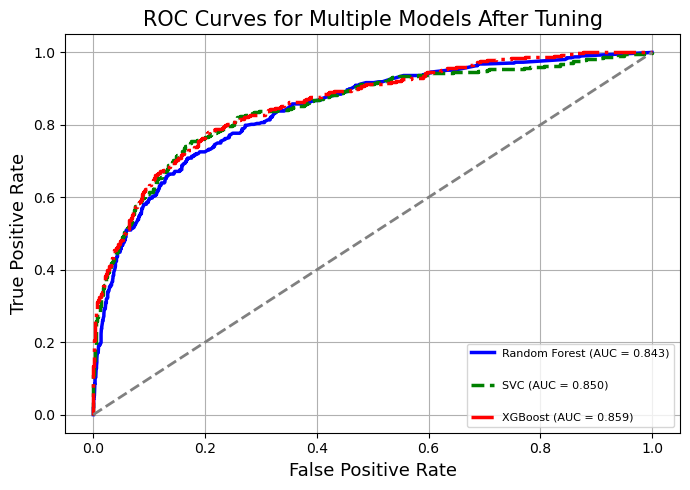

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import itertools

# Define the models
models = {
    'Random Forest': grid_search3,
    'SVC': grid_search5,
    'XGBoost': grid_search
}

# Define custom line styles and colors for each model
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Use subplots to manage the figure and axis easily
fig, ax = plt.subplots(figsize=(7, 5))

# Loop through models with color and linestyle
for (name, model), style, color in zip(models.items(), line_styles, colors):
    
    # Get probability estimates or decision function (for models like SVC)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = model.decision_function(X_test_scaled)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve with appropriate linestyle, color, and linewidth
    ax.plot(fpr, tpr, linestyle=style, color=color, linewidth=2.5, label=f'{name} (AUC = {auc:.3f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

# Set labels and title with bigger font sizes
ax.set_title('ROC Curves for Multiple Models After Tuning', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=13)
ax.set_ylabel('True Positive Rate', fontsize=13)

# Improve the legend by increasing font size and spacing between lines
ax.legend(loc='lower right', fontsize=8, labelspacing=2)

# Add grid for better readability
ax.grid(True)

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()
